Hypothesis Generation:
In this problem it is desirable to explore which features affect sales in BigMart retail company.
I assume that sales (dependent variable) is affected by the following:
1. Product price
2. Store location
3. Product type
4. Way of introducing the product _ its marketing inside store or even outside it

Import necessary Libraries to work with

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

Load train & test data sets & see their shapes

In [72]:
#load train and test data sets
data_train = pd.read_csv('/Train.csv')
print("data train shape : ",data_train.shape)
data_test = pd.read_csv('/Test.csv')
print("data test shape : ",data_test.shape)

data train shape :  (8523, 12)
data test shape :  (5681, 11)


Explore features in train data frame (EDA)

In [73]:
#explore head od data train data frame
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [74]:
#explore data_train info
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [75]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [76]:
data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [77]:
data_train2=data_train.copy()

In [78]:
#check for duplicate rows
duplicate=data_train.duplicated()
print(duplicate.sum())
data_train[duplicate]

0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


Univariate Analysis

In [79]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [80]:
data_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [81]:
data_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [82]:
data_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [83]:
data_train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [84]:
data_train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [85]:
data_train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

<Axes: >

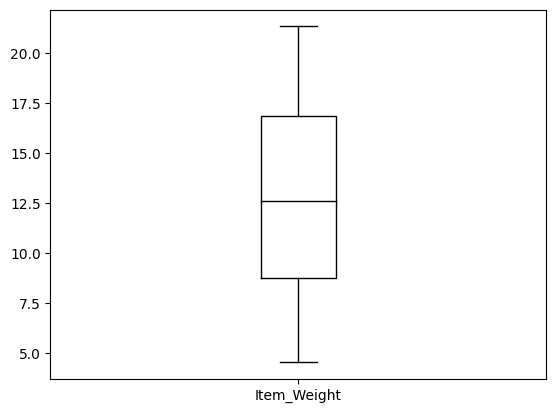

In [86]:
data_train.boxplot(column=['Item_Weight'], grid=False, color='black')

<Axes: >

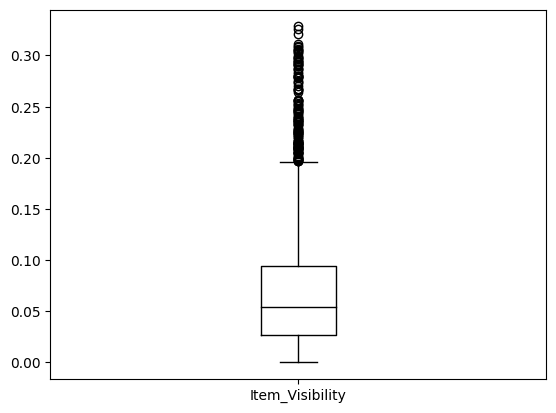

In [87]:
data_train.boxplot(column=['Item_Visibility'], grid=False, color='black')

<Axes: >

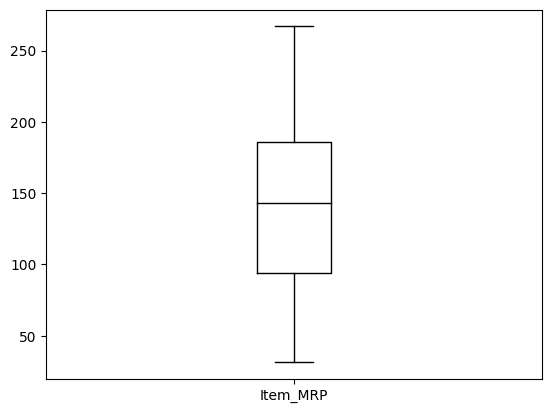

In [88]:
data_train.boxplot(column=['Item_MRP'], grid=False, color='black')

array([[<Axes: title={'center': 'Item_Weight'}>]], dtype=object)

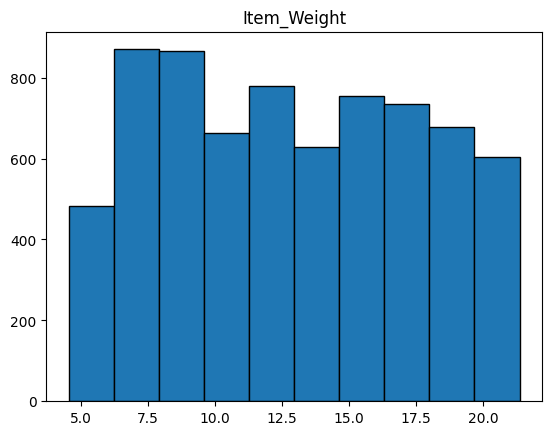

In [89]:
data_train.hist(column='Item_Weight', grid=False, edgecolor='black')

array([[<Axes: title={'center': 'Item_Visibility'}>]], dtype=object)

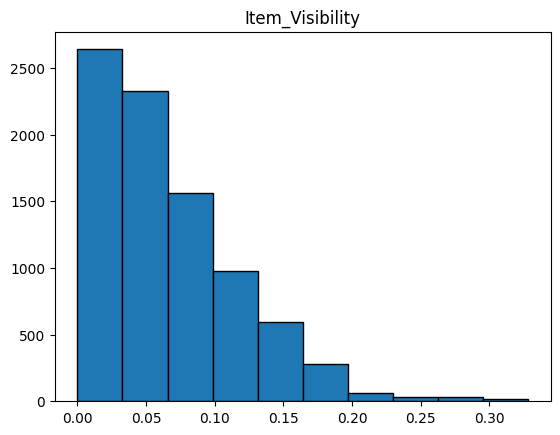

In [90]:
data_train.hist(column='Item_Visibility', grid=False, edgecolor='black')

array([[<Axes: title={'center': 'Item_MRP'}>]], dtype=object)

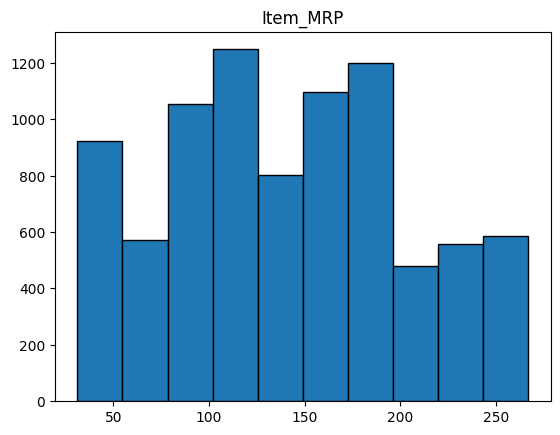

In [91]:
data_train.hist(column='Item_MRP', grid=False, edgecolor='black')

array([[<Axes: title={'center': 'Outlet_Establishment_Year'}>]],
      dtype=object)

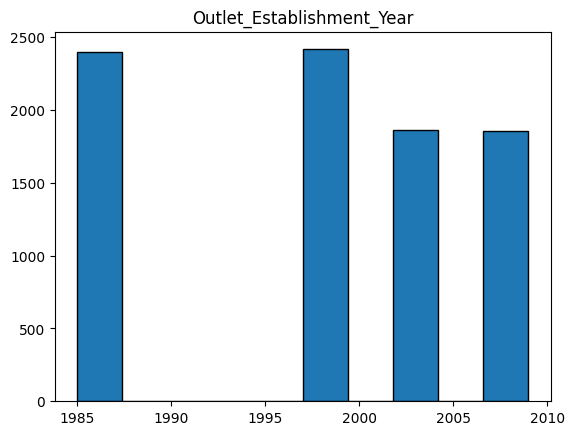

In [92]:
data_train.hist(column='Outlet_Establishment_Year', grid=False, edgecolor='black')

In [93]:
data_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

<Axes: >

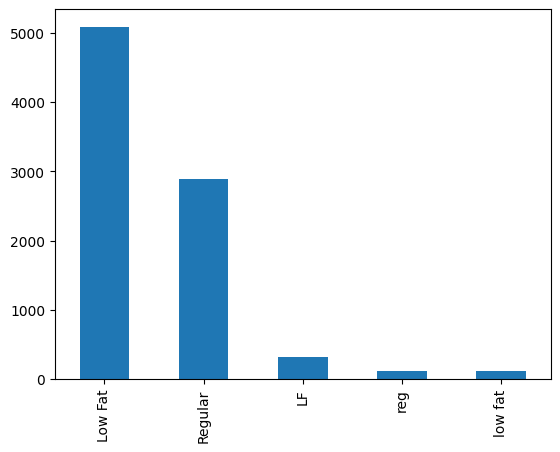

In [94]:
data_train['Item_Fat_Content'].value_counts().plot.bar()

<Axes: >

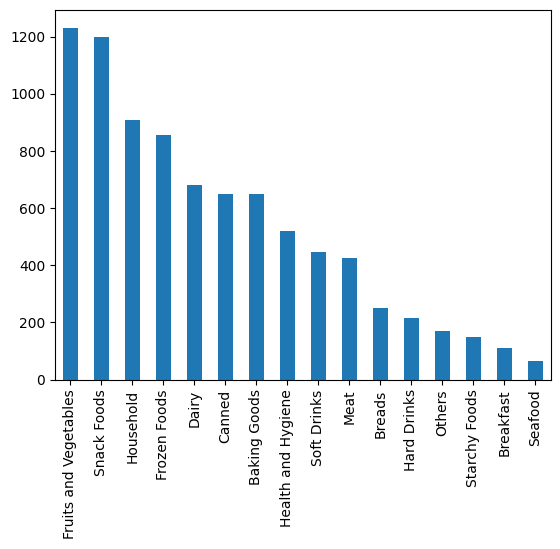

In [95]:
data_train['Item_Type'].value_counts().plot.bar()

<Axes: >

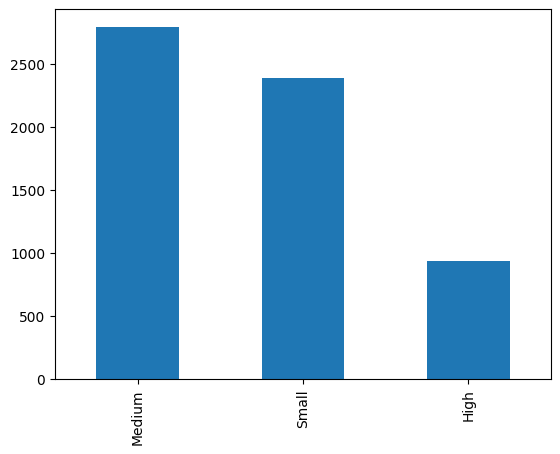

In [96]:
data_train['Outlet_Size'].value_counts().plot.bar()

<Axes: >

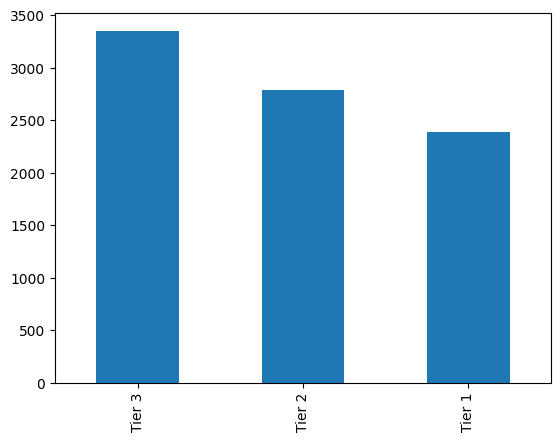

In [97]:
data_train['Outlet_Location_Type'].value_counts().plot.bar()

<Axes: >

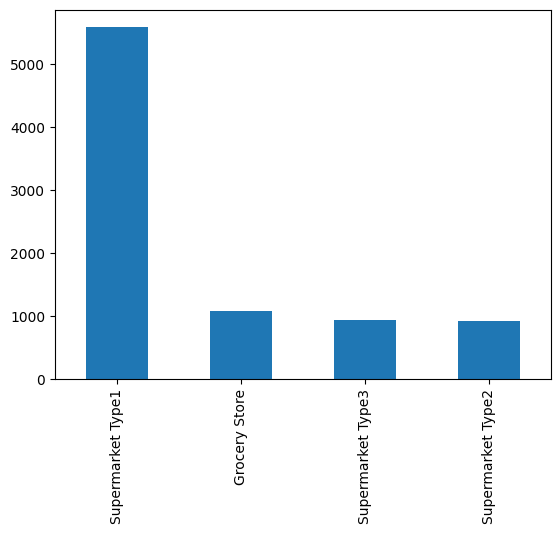

In [98]:
data_train['Outlet_Type'].value_counts().plot.bar()

([<matplotlib.patches.Wedge at 0x79cfaafeb0d0>,
 [Text(0.14850483957937807, 1.0899294989225237, 'Medium'),
  Text(-0.6341073932552532, -0.8988369228169412, 'High'),
  Text(0.9762153340953503, -0.5069552460297692, 'Small')])

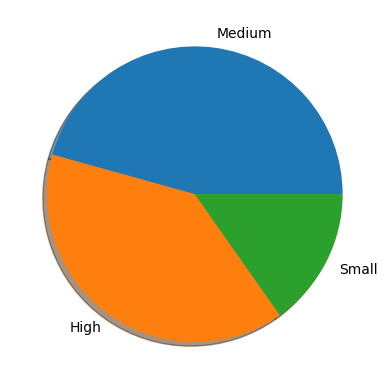

In [99]:
plt.pie(data_train['Outlet_Size'].value_counts(),
        labels=['Medium','High','Small']
        ,shadow=True)

BiVariate Analysis

Text(0, 0.5, 'Sales')

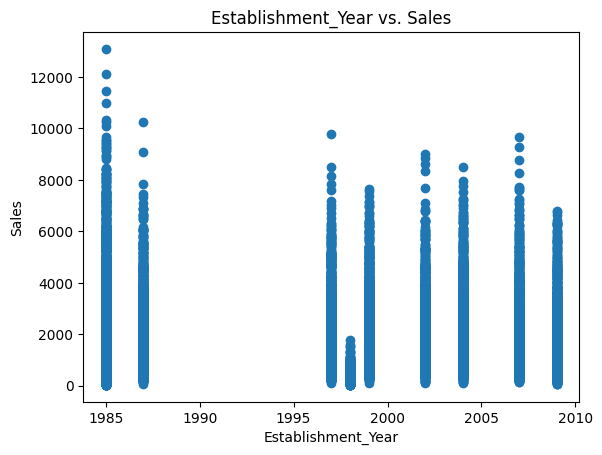

In [100]:
#create scatterplot of year vs. sales
plt.scatter(data_train.Outlet_Establishment_Year, data_train.Item_Outlet_Sales)
plt.title('Establishment_Year vs. Sales')
plt.xlabel('Establishment_Year')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

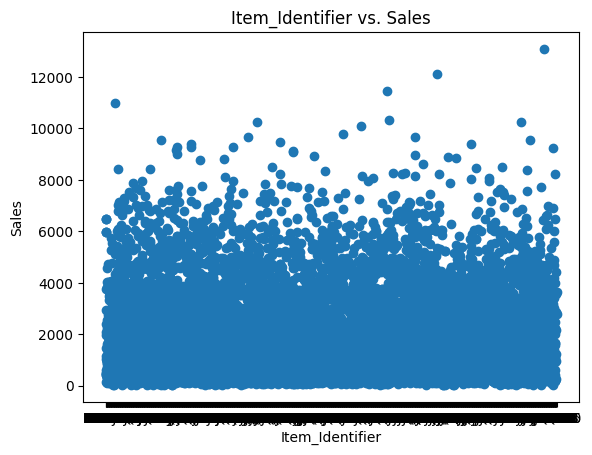

In [101]:
#create scatterplot of item identifier vs. sales
plt.scatter(data_train.Item_Identifier, data_train.Item_Outlet_Sales)
plt.title('Item_Identifier vs. Sales')
plt.xlabel('Item_Identifier')
plt.ylabel('Sales')

In [102]:
data_train.corr()

<ipython-input-102-e6bb2ed549f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_train.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<ipython-input-103-b8a7a15e39ec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(data_train.corr(), cmap="viridis", annot=True)


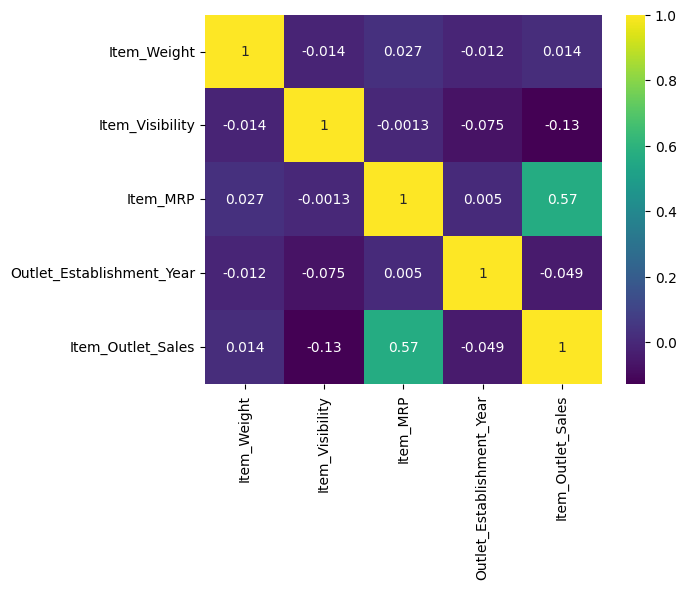

In [103]:
# plotting correlation heatmap
dataplot = sns.heatmap(data_train.corr(), cmap="viridis", annot=True)

In [104]:
#Explore year relationship with sales
#define response variable
y = data_train['Item_Outlet_Sales']

#define explanatory variable
x = data_train[['Outlet_Establishment_Year']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     20.62
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           5.67e-06
Time:                        12:58:37   Log-Likelihood:                -75513.
No. Observations:                8523   AIC:                         1.510e+05
Df Residuals:                    8521   BIC:                         1.510e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Missing Value Treatment

In [105]:
#replace nan values in item weight by its mean
mean_value_weight=data_train['Item_Weight'].mean()
data_train['Item_Weight'].fillna(value=mean_value_weight, inplace=True)


In [106]:
#Fill missing value with mode in outlet size feature
mode_value_outlet_size=data_train['Outlet_Size'].mode().values[0]
data_train["Outlet_Size"]=data_train["Outlet_Size"].replace(np.nan,mode_value_outlet_size)

Feature Engineering & Data Pre-Processing

In [107]:
#drop item identifier feature from data frame
data_train.drop(['Item_Identifier'], axis=1,inplace=True)
data_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [108]:
#grouping same categories have different names in item fat content
data_train['Item_Fat_Content'] = np.where(data_train['Item_Fat_Content']=='LF','Low Fat',
                                  data_train['Item_Fat_Content'])
data_train['Item_Fat_Content'] = np.where(data_train['Item_Fat_Content']=='low fat','Low Fat',
                                  data_train['Item_Fat_Content'])
data_train['Item_Fat_Content'] = np.where(data_train['Item_Fat_Content']=='reg','Regular',
                                  data_train['Item_Fat_Content'])

In [109]:
data_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [110]:
data_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [111]:
data_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [112]:
#Replace zero with median values in item visibility column as zero visibility
# does not make sense
data_train['Item_Visibility'].replace(to_replace = 0, value = data_train['Item_Visibility'].median(), inplace=True)

In [113]:
#remove outlier function
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range


In [114]:
#remove outliers from item visibility column
lowvis,uppvis=remove_outlier(data_train['Item_Visibility'])
data_train['Item_Visibility']=np.where(data_train['Item_Visibility']>uppvis,uppvis,
                                               data_train['Item_Visibility'])
data_train['Item_Visibility']=np.where(data_train['Item_Visibility']<lowvis,
                                               lowvis,data_train['Item_Visibility'])

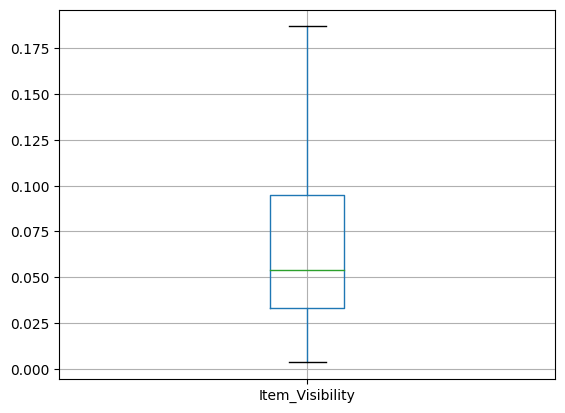

In [115]:
data_train.boxplot(column=['Item_Visibility'])
plt.show()

In [116]:
#create square root-transformed item visibility because of its skewness
data_train['Item_Visibility'] = np.sqrt(data_train['Item_Visibility'])

array([[<Axes: title={'center': 'Item_Visibility'}>]], dtype=object)

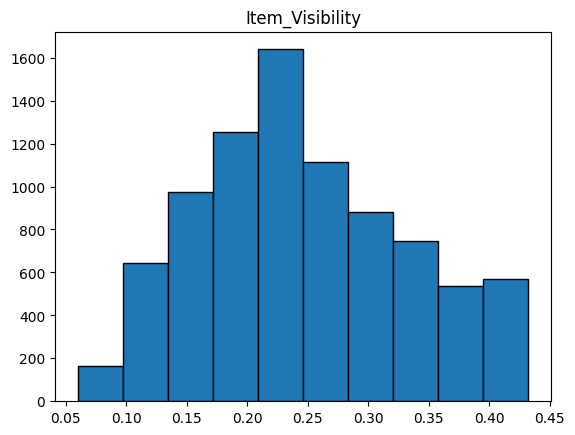

In [117]:
#explore item vis after sqrt transformation
data_train.hist(column='Item_Visibility', grid=False, edgecolor='black')

In [118]:
data_train.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [119]:
#drop outlier identifier feature from data frame
data_train.drop(['Outlet_Identifier'], axis=1,inplace=True)
data_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.126678,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.138846,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.129461,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.232230,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.232230,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [120]:
#drop est.year feature from data frame
#data_train.drop(['Outlet_Establishment_Year'], axis=1,inplace=True)
#data_train.head()

Encoding Categorical Variables

In [121]:
#encode item type variable using frequency encoding

# Frequency encoding using value_counts function
Item_Type_freq = data_train['Item_Type'].value_counts(normalize=True)

# Mapping the encoded values with original data
data_train['Item_Type_freq'] = data_train['Item_Type'].apply(lambda x : Item_Type_freq[x])

print('The sum of Item_Type_freq variable:', sum(Item_Type_freq))
data_train[['Item_Type', 'Item_Type_freq']].head(6)

The sum of Item_Type_freq variable: 1.0


,Item_Type,Item_Type_freq
0,Dairy,0.080019
1,Soft Drinks,0.052212
2,Meat,0.049865
3,Fruits and Vegetables,0.144550
4,Household,0.106770
5,Baking Goods,0.076030


In [122]:
#drop item_type from data frame
data_train.drop(['Item_Type'], axis=1,inplace=True)
data_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_freq
0,9.30,Low Fat,0.126678,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.080019
1,5.92,Regular,0.138846,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.052212
2,17.50,Low Fat,0.129461,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.049865
3,19.20,Regular,0.232230,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,0.144550
4,8.93,Low Fat,0.232230,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,0.106770


In [123]:
#label encoding for outlet location type variable
#Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data_train['Outlet_Location_Type']= label_encoder.fit_transform(data_train['Outlet_Location_Type'])

data_train['Outlet_Location_Type'].unique()

array([0, 2, 1])

In [124]:
data_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_freq
0,9.30,Low Fat,0.126678,249.8092,1999,Medium,0,Supermarket Type1,3735.1380,0.080019
1,5.92,Regular,0.138846,48.2692,2009,Medium,2,Supermarket Type2,443.4228,0.052212
2,17.50,Low Fat,0.129461,141.6180,1999,Medium,0,Supermarket Type1,2097.2700,0.049865
3,19.20,Regular,0.232230,182.0950,1998,Medium,2,Grocery Store,732.3800,0.144550
4,8.93,Low Fat,0.232230,53.8614,1987,High,2,Supermarket Type1,994.7052,0.106770


In [125]:
#one hot encoding for other categorical variables of interest
columns=['Fat_Content','Outlet_Size','Outlet_Type']
data_train_encoded = pd.get_dummies(data_train,prefix=columns,drop_first=True)


In [126]:
pd.set_option('display.max_columns', None)

In [127]:
data_train_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_freq,Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.126678,249.8092,1999,0,3735.1380,0.080019,0,1,0,1,0,0
1,5.92,0.138846,48.2692,2009,2,443.4228,0.052212,1,1,0,0,1,0
2,17.50,0.129461,141.6180,1999,0,2097.2700,0.049865,0,1,0,1,0,0
3,19.20,0.232230,182.0950,1998,2,732.3800,0.144550,1,1,0,0,0,0
4,8.93,0.232230,53.8614,1987,2,994.7052,0.106770,0,0,0,1,0,0


Splitting train dataset into train & test data sets

In [128]:
from sklearn import tree
from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeRegressor

In [129]:
features = ['Item_Weight','Item_Visibility','Item_MRP','Fat_Content_Regular',
            'Outlet_Establishment_Year','Outlet_Size_Medium',
            'Outlet_Size_Small','Outlet_Type_Supermarket Type1',
            'Outlet_Type_Supermarket Type2','Outlet_Type_Supermarket Type3']
X = data_train_encoded.loc[:, features]
y = data_train_encoded.loc[:, ['Item_Outlet_Sales']]

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = .75)

In [131]:
data_train_encoded.shape

(8523, 13)

In [132]:
X_train.shape

(6392, 10)

In [133]:
X_test.shape

(2131, 10)

In [134]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

# Create new DataFrame
column_names=['Item_Weight','Item_Visibility','Item_MRP','Fat_Content_Regular',
            'Outlet_Establishment_Year','Outlet_Size_Medium','Outlet_Size_Small',
              'Outlet_Type_Supermarket Type1','Outlet_Type_Supermarket Type2',
              'Outlet_Type_Supermarket Type3']

df_new = pd.DataFrame(X_train_norm,columns=column_names)

df_new.describe()


,Item_Weight,Item_Visibility,Item_MRP,Fat_Content_Regular,Outlet_Establishment_Year,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,0.496833,0.504929,0.465394,0.354506,0.533219,0.612015,0.282384,0.652847,0.106383,0.113579
std,0.251588,0.233092,0.265431,0.478401,0.348782,0.487329,0.450194,0.476102,0.308351,0.317325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288181,0.328445,0.262971,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.494352,0.465930,0.472729,0.000000,0.583333,1.000000,0.000000,1.000000,0.000000,0.000000
75%,0.687407,0.671321,0.655075,1.000000,0.791667,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Modelling

Linear Regression

In [135]:
#creating a model
from sklearn.linear_model import LinearRegression

# creating a object
reg = LinearRegression()

#training the model
reg.fit(X_train_norm, y_train)

# Predicting multiple observations
reg.predict(X_test_norm[0:10])

#using the training dataset for the prediction
pred = reg.predict(X_train_norm)

#model performance
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_train, pred)
r2 = r2_score(y_train, pred)#Best fit lineplt.scatter(x, y)
#plt.plot(X_train_norm, pred, color = 'Black', marker = 'o')

#Results
print("Mean Squared Error : ", mse)
print("R-Squared :" , r2)
print("Y-intercept :"  , reg.intercept_)
print("Slope :" , reg.coef_)

Mean Squared Error :  1309075.6273469706
R-Squared : 0.5601204036541836
Y-intercept : [-1339.23454859]
Slope : [[ -11.6260429   -22.18113957 3672.75322649   53.27056281  229.27915472
  -147.02496459  -76.34783715 1900.43111408 1504.09088381 3495.5595844 ]]


In [136]:
score = reg.score(X_test_norm, y_test)
print(score)

0.5701285275739152


Regularized Linear Regression
Apply Ridge(L2) Regression model

In [137]:
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []

# List to maintain the different values of alpha
alpha = []

# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train_norm, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)

# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 55.9998188367949
0.5 : 55.9998771803885
0.75 : 55.999893928906566
1.0 : 55.99986942106783
1.25 : 55.99980399129551
1.5 : 55.99969796980834
1.75 : 55.99955168270904
2.0 : 55.99936545207002


In [138]:
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 0.75)
ridgeModelChosen.fit(X_train_norm, y_train)

# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test_norm, y_test))

0.5702179660543896


Random Forest Regression

In [139]:
from sklearn.ensemble import RandomForestRegressor
# define the model
model = RandomForestRegressor()
# fit the model on the whole dataset
model.fit(X_train_norm, y_train)
# make prediction
preds_train = model.predict(X_train_norm)
preds_test = model.predict(X_test_norm)

print (model.score(X_train_norm, y_train))
print(model.score(X_test_norm, y_test))

<ipython-input-139-ae7772213e66>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_norm, y_train)


0.9370476677639745
0.5331086373497


XGBoost REGRESSION

In [140]:
###### Xgboost Regression in Python #######
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:linear', booster='gbtree')

#Printing all the parameters of XGBoost
print(RegModel)

#Creating the model on Training Data
XGB=RegModel.fit(X_train_norm,y_train)
prediction=XGB.predict(X_test_norm)

#evaluate model
train_accuracy=XGB.score(X_train_norm, y_train)
print("Train Accuracy: ",train_accuracy)

test_accuracy=XGB.score(X_test_norm, y_test)
print("Test Accuracy: ",test_accuracy)


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:58:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Train Accuracy:  0.6928393518858831
Test Accuracy:  0.5743811195742585
